<a href="https://colab.research.google.com/github/karanjogi/Practice/blob/master/Lecture_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
df.shape

(3333, 20)

In [0]:
df['International plan'] = df['International plan'].map({'Yes' : 1,
                                                         'No' : 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes' : 1,
                                                         'No' : 0})

In [0]:
df['Churn'] = df['Churn'].astype('int')

In [9]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [0]:
states = df.pop('State')

In [0]:
X, y = df.drop('Churn', axis=1), df['Churn']

In [12]:
X.shape, y.shape

((3333, 18), (3333,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_valid, y_train, y_valid= train_test_split(X,
                                                     y,
                                                     test_size=0.3,
                                                     random_state=15)

In [17]:
X_train.shape

(2333, 18)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree = DecisionTreeClassifier(random_state=15)

In [20]:
tree.fit(X_train,
         y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [0]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score

In [0]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)

In [72]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []
max_depth_values = np.arange(2, 11)
for max_depth in tqdm(max_depth_values):
  tree = DecisionTreeClassifier(random_state=15, max_depth=max_depth)
  val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)

  cv_accuracies_by_depth.append(val_scores.mean())

  tree.fit(X_train, y_train)
  pred = tree.predict(X_valid)

  ho_accuracies_by_depth.append(accuracy_score(y_valid, pred))

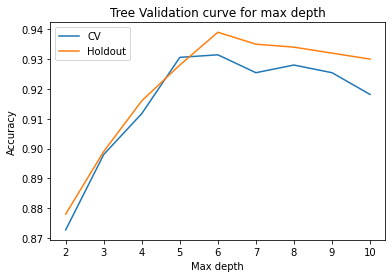

In [78]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV');
plt.plot(max_depth_values, ho_accuracies_by_depth, label='Holdout');
plt.legend();
plt.xlabel('Max depth');
plt.ylabel('Accuracy');
plt.title('Tree Validation curve for max depth');

In [0]:
pred_valid = tree.predict(X_valid)

In [24]:
pred_valid.shape, y_valid.shape

((1000,), (1000,))

In [25]:
accuracy_score(pred_valid,
               y_valid)

0.91

In [27]:
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
params = {'max_depth' : np.arange(2,11),
          'min_samples_leaf' : np.arange(2,11)}

In [0]:
tree_2 = GridSearchCV(tree, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

In [83]:
tree_2.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    6.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=15,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             p

In [84]:
tree_2.best_params_

{'max_depth': 8, 'min_samples_leaf': 8}

In [85]:
tree_2.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

**Cross-validation assessment of model quality**

In [86]:
tree_2.best_score_

0.937430958267087

**Holdout Assessment**

In [0]:
pred_valid_2 = tree_2.predict(X_valid)

In [88]:
accuracy_score(pred_valid_2, y_valid)

0.946

In [0]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from ipywidgets import Image

In [96]:
data_dot = StringIO()
export_graphviz(decision_tree=tree_2.best_estimator_, out_file=data_dot, filled=True, feature_names=df.drop('Churn', axis=1).columns)
graph = pydotplus.graph_from_dot_data(data_dot.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x14G\x00\x00\x04\xa7\x08\x06\x00\x00\x00\xa9\x94\xd2…